<center>
In God We Trust
</center>

# CE417: Artificial Intelligence

Dr. Mahdiyeh Soleymani Baghshah, Associate Professor

Computer Engineering Department,
Sharif University of Technology,
Tehran, Tehran, Iran


# MNIST Autoencoder (20 Points)

Corresponding TA: Aryan Ahadinia

In this problem, we want to train an autoencoder. Autoencoder is a type of neural network which is used for unsupervised tasks. Figure below is showing a simple autoencoder.

<center>
<img src="./assets/autoencoder.png" style="width: 50%">
</center>

We want to train a neural network which get a noisy image as input and denoise it in the output. We focus on MNIST dataset. MNIST is a dataset containing 60000 images of hand-written digits. We artificially add a random noise to images and then we train our network to get the noisy image as input and give the cleared image in the output.

<center>
<img src="./assets/desc.png" style="width: 50%">
</center>


If you have an nVidia CUDA-compatible GPU, you can proceed to install CUDA and a CUDA-compatible pytorch versions. You can also use Google Colaboratory or Kaggle.
 

In [1]:
# %pip install numpy
# %pip install tqdm
# %pip install matplotlib
# %pip install torch torchvision torchaudio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn

from tqdm import tqdm


In cell below, we load our data.

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

mnist_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
mnist_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)


In [4]:
from keras.datasets import mnist
(x_train, label_train), (x_test, label_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
mnist_train[1650][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

Now we want to wrap our dataset in torch datasets. Each item in our dataset must contain tree entities, the noisy image, the original image and the label. Apply a noise on the original image regarding the noise factor.

Complete cell below. (3 Points)


In [8]:
class NoisyDataset(torch.utils.data.Dataset):
  def __init__(self, dataset, noise_factor=0.5):
      # self.dataset = dataset + torch.randn_like(dataset) * noise_factor
      self.dataset = []
      for x in dataset:
        # img = x[0] + torch.randn_like(x[0]) * noise_factor
        img = x + noise_factor * (np.random.normal(loc=0.0, scale=60.0, size=x.shape))
        # img = np.clip(img, 0., 1.)
        self.dataset.append((img, x[1]))

    #   noisy = inputs+torch.randn_like(inputs) * noise_factor
    #  noisy = torch.clip(noisy,0.,1.)
      self.noise_factor = noise_factor
        ####################################
        ###### Code Here (0.5 Points) ######
        ####################################
      # print(dataset)

  def __getitem__(self, index):
    indexed = self.dataset[index]
    return indexed[0]

        ####################################
        ####### Code Here (2 Points) #######
        ####################################

  def __len__(self):
        ####################################
        ###### Code Here (0.5 Points) ######
        ####################################
        return len(self.dataset)


In [9]:
# noisy_mnist_train = NoisyDataset(mnist_train, 0.6)
# noisy_mnist_test = NoisyDataset(mnist_test, 0.6)
# mnist_train_loader = torch.utils.data.DataLoader(
#     noisy_mnist_train, batch_size=60, shuffle=True
# )
# mnist_test_loader = torch.utils.data.DataLoader(
#     noisy_mnist_test, batch_size=60, shuffle=True
# )


In [10]:
noisy_mnist_train = np.array(NoisyDataset(x_train, 0.6)) / 255
noisy_mnist_test = np.array(NoisyDataset(x_test, 0.6)) / 255
mnist_train_loader = torch.utils.data.DataLoader(
    noisy_mnist_train, batch_size=60, shuffle=True
)
mnist_test_loader = torch.utils.data.DataLoader(
    noisy_mnist_test, batch_size=60, shuffle=True
)

In [11]:
x_train = x_train / 255
x_test = x_test / 255

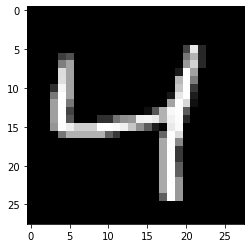

In [12]:
plt.imshow(x_train[2], cmap = 'gray')

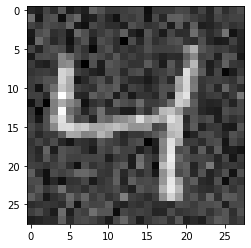

In [13]:
plt.imshow(noisy_mnist_train[2], cmap = 'gray')

In [14]:
len(noisy_mnist_train)

60000

Now, design a proper network architecture. Complete cell below. (6 Points)

In [15]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         ############################
#         ### Code Here (5 Points) ###
#         ############################
#         self.network = None
#         pass

#     def forward(self, img):
#         ############################
#         ### Code Here (1 Points) ###
#         ############################
#         pass
# the autoencoder network

# import torch.nn.functional as F
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         # encoder layers
#         self.enc1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
#         self.enc2 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
#         self.enc3 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
#         self.enc4 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
        
#         # decoder layers
#         self.dec1 = nn.ConvTranspose2d(8, 8, kernel_size=3, stride=2)  
#         self.dec2 = nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2)
#         self.dec3 = nn.ConvTranspose2d(16, 32, kernel_size=2, stride=2)
#         self.dec4 = nn.ConvTranspose2d(32, 64, kernel_size=2, stride=2)
#         self.out = nn.Conv2d(64, 1, kernel_size=3, padding=1)
#     def forward(self, x):
#         # encode
#         x = F.relu(self.enc1(x))
#         x = self.pool(x)
#         x = F.relu(self.enc2(x))
#         x = self.pool(x)
#         x = F.relu(self.enc3(x))
#         x = self.pool(x)
#         x = F.relu(self.enc4(x))
#         x = self.pool(x) # the latent space representation
        
#         # decode
#         x = F.relu(self.dec1(x))
#         x = F.relu(self.dec2(x))
#         x = F.relu(self.dec3(x))
#         x = F.relu(self.dec4(x))
#         x = F.sigmoid(self.out(x))
#         return x
# net = Autoencoder()
# print(net)

# import torch.nn as nn
# import torch.nn.functional as F

# # define the NN architecture
# class Net(nn.Module):
#     def __init__(self, encoding_dim):
#         super(Net, self).__init__()
#         ## encoder ##
#         # linear layer (784 -> encoding_dim)
#         self.fc1 = nn.Linear(28 * 28, encoding_dim)
        
#         ## decoder ##
#         # linear layer (encoding_dim -> input size)
#         self.fc2 = nn.Linear(encoding_dim, 28*28)
        

#     def forward(self, x):
#         # add layer, with relu activation function
#         x = F.relu(self.fc1(x))
#         # output layer (sigmoid for scaling from 0 to 1)
#         x = F.sigmoid(self.fc2(x))
#         return x

# # initialize the NN
# encoding_dim = 32
# model = Net(encoding_dim)
# print(model)

In [16]:
# ! pip install tensorflow

Now, train the network. We recommend MSE Loss and Adam Optimizer. (6 Points)

In [17]:
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.models import Sequential, Model 
import tensorflow as tf
# input_image = Input(shape = (784, ) ) 
 
# encoded = Dense(512, activation = 'relu')(input_image) 
# encoded = Dense(512, activation = 'relu')(encoded) 
# encoded = Dense(256, activation = 'relu')(encoded) 
# encoded = Dense(256, activation = 'relu')(encoded) 
# encoded = Dense(64, activation = 'relu')(encoded) 
 
# decoded = Dense(512, activation = 'relu')(encoded) 
# decoded = Dense(784, activation = 'sigmoid')(decoded) 
 
# model = Model(input_image, decoded) 
# model.compile(loss = tf.keras.losses.MSE , optimizer = 'adam') 
# model.summary() 

# model = Sequential()
# model.add(Dense(500, input_dim=784, activation='relu'))
# model.add(Dense(300, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(300, activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(784, activation='sigmoid'))
# model.compile(loss='mean_squared_error', optimizer='adam')

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(784, activation='relu'))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01))

In [18]:
# x = np.array(noisy_mnist_train)
# import torch.tensor as tf
# x = tf.reshape(noisy_mnist_train, [60000, 28, 28])
# x = torch.Tensor.squeeze
# x = torch.Tensor(mnist_train)
# X_train_noisy = np.zeros((60000, 28 * 28), dtype = 'float32')
# X_train = np.zeros((60000, 28 * 28), dtype = 'float32')

In [19]:
# for cont in range(len(noisy_mnist_train)):
#   data = noisy_mnist_train[cont]
#   new_ = np.array(data[0])
#   X_train_noisy[cont] = new_.flatten()

# for cont in range(len(mnist_train)):
#   data = mnist_train[cont]
#   new_ = np.array(data[0])
#   X_train[cont] = new_.flatten()


In [20]:
# X_test_noisy = np.zeros((10000, 28 * 28), dtype = 'float32')
# X_test = np.zeros((10000, 28 * 28), dtype = 'float32')

In [21]:
# for cont in range(len(noisy_mnist_test)):
#   data = noisy_mnist_test[cont]
#   new_ = np.array(data[0])
#   X_test_noisy[cont] = new_.flatten()
#   # plt.imshow(X_test_noisy[cont].reshape(28, 28))
#   # break

# for cont in range(len(mnist_test)):
#   data = mnist_test[cont]
#   new_ = np.array(data[0])
#   X_test[cont] = new_.flatten()



In [22]:
# np.min(X_train)

In [23]:
# np.min(X_test)

In [24]:
# np.max(X_train_noisy)

In [25]:
# np.max(X_test_noisy)

In [26]:
# X_train1 = X_train / 1
# X_test1 = X_test / 1
# X_train_noisy1 = X_train_noisy / 1
# X_test_noisy1 = X_test_noisy / 1

In [27]:
# import tensorflow as tf 

# y = mnist_train[:][0][0]
# history = autoencoder.fit(new_dataset, new_dataset, epochs=100, batch_size=128, 
#  shuffle = True, validation_data=(new_dataset, new_dataset)) 
noisy_mnist_train = noisy_mnist_train.reshape(60000, 784)
x_train = x_train.reshape(60000, 784)
model.fit(noisy_mnist_train, x_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 46s 23ms/step - loss: 0.0479
Epoch 2/2
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0313


In [34]:
pred = model.predict(noisy_mnist_test.reshape(10000, 784))

313/313 [==============================] - 2s 5ms/step


In [35]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.12061961,  0.02558202,  0.10687371, ...,  0.06132363,
         -0.0051129 ,  0.04494111],
        [ 0.09243535,  0.02773633,  0.07874851, ...,  0.11786804,
          0.11739269,  0.09593419],
        [-0.02440064,  0.05050724,  0.0974879 , ...,  0.06724516,
         -0.00418661,  0.03512143],
        ...,
        [-0.08592514,  0.0833061 ,  0.02684952, ...,  0.0804372 ,
          0.06447987,  0.00347822],
        [-0.0896544 ,  0.10661611,  0.00043137, ..., -0.03115829,
          0.08699265, -0.04367342],
        [-0.08945801, -0.08618968,  0.08260529, ..., -0.00026429,
          0.09880075, -0.08123092]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.06447487, -0.06086291, -0.04705682, -0.07735899, -0.04965639,
        -0.05739007, -0.04777182, -0.06412522, -0.04660583, -0.04778945,
        -0.04684025, -0.04681898, -0.06425316, -0.0469223 , -0.0533044 ,
    

Now, plot the results like figure above. (5 Points)

Real


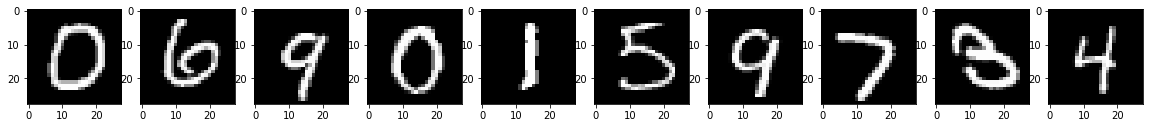

Noised


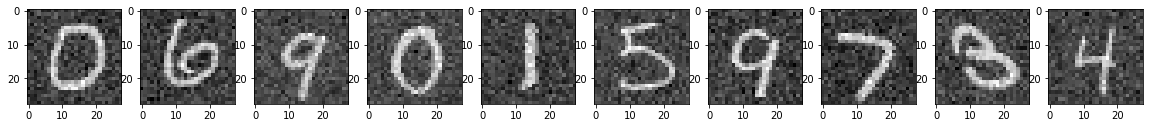

Denoised


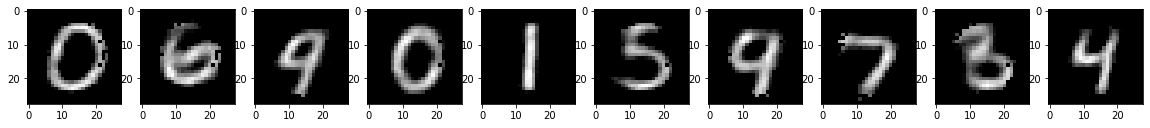

In [37]:
X_test = np.reshape(x_test, (10000,28,28)) *255 
pred = np.reshape(pred, (10000,28,28)) *255
X_test_noisy1 = np.reshape(noisy_mnist_test, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Real")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Noised")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(noisy_mnist_test[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Denoised")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

In [ ]:
############################
### Code Here (6 Points) ###
############################

# the loss function
# import torch.optim as optim
# criterion = nn.MSELoss()
# # the optimizer
# optimizer = optim.Adam(net.parameters(), lr=0.1)

# specify loss function
# criterion = nn.MSELoss()

# # specify loss function
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)




In [ ]:
# # number of epochs to train the model
# n_epochs = 3

# for epoch in range(1, n_epochs+1):
#     # monitor training loss
#     train_loss = 0.0
    
#     ###################
#     # train the model #
#     ###################
#     for data in noisy_mnist_train:
#         # _ stands in for labels, here
#         images, _ = data
#         # flatten images
#         images = images.view(images.size(0), -1)
#         # clear the gradients of all optimized variables
#         optimizer.zero_grad()
#         # forward pass: compute predicted outputs by passing inputs to the model
#         outputs = model(images)
#         # print(outputs)
#         # calculate the loss
#         loss = criterion(outputs, images)
#         # backward pass: compute gradient of the loss with respect to model parameters
#         loss.backward()
#         # perform a single optimization step (parameter update)
#         optimizer.step()
#         # update running training loss
#         train_loss += loss.item()*images.size(0)
            
#     # print avg training statistics 
#     train_loss = train_loss/len(noisy_mnist_train)
#     print('Epoch: {} \tTraining Loss: {:.6f}'.format(
#         epoch, 
#         train_loss
#         ))

In [ ]:
# plt.imshow(noisy_mnist_train[320][0][0])

In [ ]:
# batch_size = 60

# # obtain one batch of test images
# # image = noisy_mnist_train

# # images_flatten = images.view(images.size(0), -1)
# # get sample outputs
# output = model(torch.tensor(mnist_train))
# # prep images for display
# images = images.numpy()

# # output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# # use detach when it's an output that requires_grad
# output = output.detach().numpy()

# # plot the first ten input images and then reconstructed images
# fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# # input images on top row, reconstructions on bottom
# for images, row in zip([images, output], axes):
#     for img, ax in zip(images, row):
#         ax.imshow(np.squeeze(img), cmap='gray')
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)